## Importing Libraries

Import neccessary libraries

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
import numpy as np 

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Data loading and analysis

We will load the data and then perform some analysis on the data


In [26]:
PATH = 'data/Crop_recommendation.csv'


Load the data in the csv file

In [27]:
data = pd.read_csv(PATH)

Print the first five rows of the data to understand the structure of the data

In [28]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Display information about the data ie the data types and the number of non-null values

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Descriptive analysis

Display the summary statistics of the data

In [30]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Exploratory Data Analysis

We will start by exploring the unique labels in our data, checking the balance of classes, and examining the distribution of our features.


In [31]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

We then check whether the classes in the dataset are balanced by counting each unique value

In [32]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

We now plot the distribution of our input features

/tmp/ipykernel_3293/2560544141.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], color='greenyellow')
/tmp/ipykernel_3293/2560544141.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], color='greenyellow')
/tmp/ipykernel_3293/2560544141.py:8: UserWarning: 

`distp

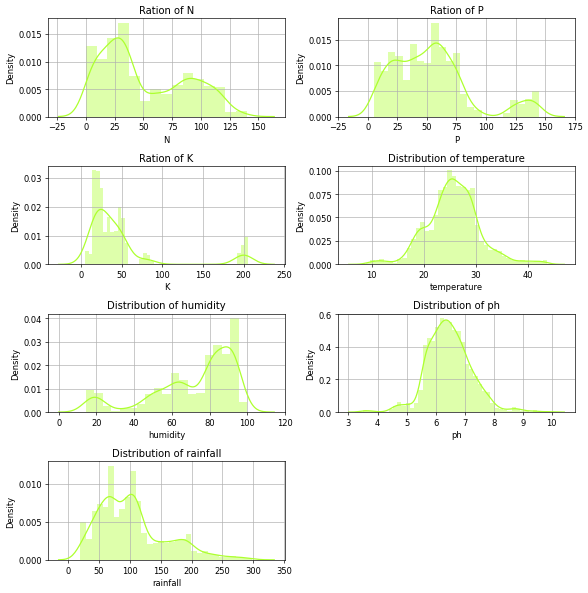

In [33]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 60

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for i, feature in enumerate(features):
    plt.subplot(4,2,i+1)
    sns.distplot(data[feature], color='greenyellow')
    if i < 3:
        plt.title(f'Ration of {feature}', fontsize = 12)
    else:
        plt.title(f'Distribution of {feature}', fontsize=12)

    plt.tight_layout()
    plt.grid()

Next, we will examine the feature distribution for different crops

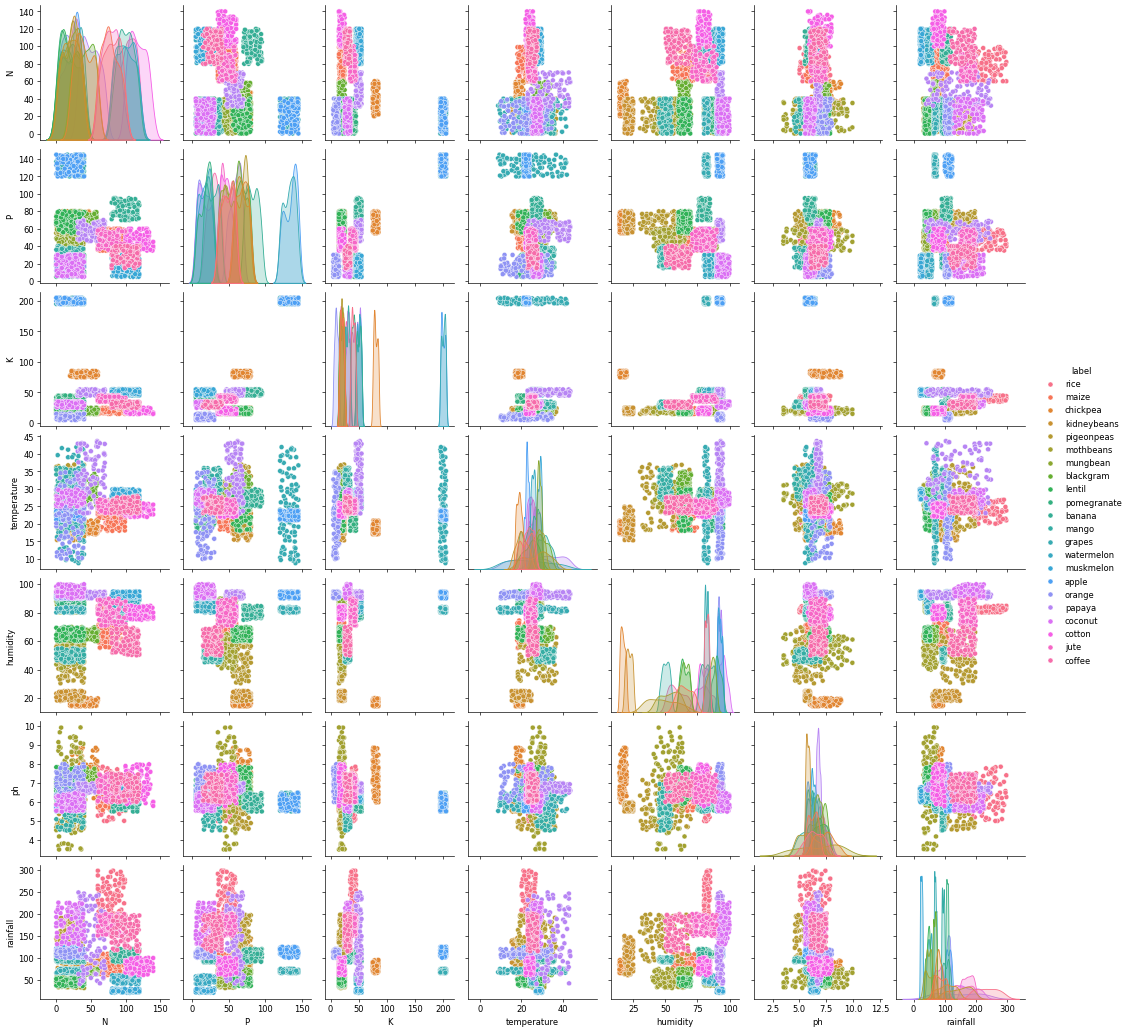

In [34]:
sns.pairplot(data, hue='label')

## Find the correlation between features

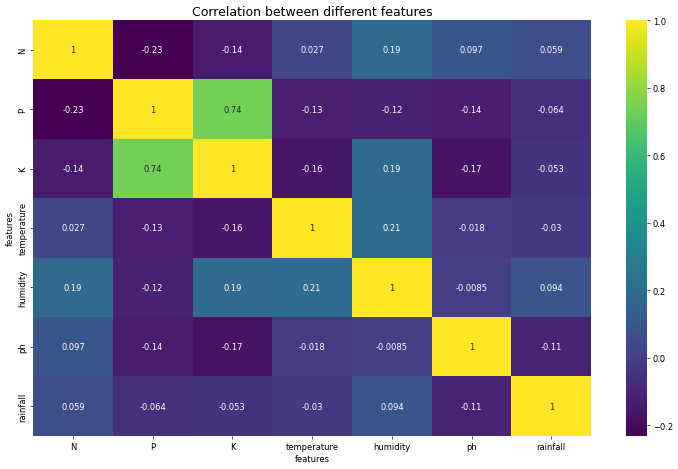

In [35]:
numeric_data = data.select_dtypes(include=[np.number])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_data.corr(),
			annot=True,
			cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features',
		fontsize=15,
		c='black')
plt.show()

## Model Training

First, we split the data to separate the input variables from the output variables

In [36]:
features = data[['N', 'P', 'K', 'temperature',
				'humidity', 'ph', 'rainfall']]

labels = data['label']

Then we split the data into training and test data. 

In [37]:
X_train, X_test,\
	Y_train, Y_test = train_test_split(features,
									labels,
									test_size=0.2,
									random_state=42)

### Training

Then we train the model using Logistic Regression

In [38]:
LogisticRegressionModel = LogisticRegression(random_state=42)\
.fit(X_train, Y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Testing the model

Next, we test the model on the test data to see how well it perfoms. We then print the accuracy of the model

In [39]:
# Predict the values for the test dataset
predicted_values = LogisticRegressionModel.predict(X_test)

# Measure the accuracy of the test 
# set using accuracy_score metric
accuracy = metrics.accuracy_score(Y_test,
								predicted_values)


# Print out the accuracy of the model
print("Logistic Regression Accuracy: ", accuracy)

Logistic Regression Accuracy:  0.9454545454545454


### Accuracy analysis for each crop

We can then print the accuracy of the model for each crop

In [40]:
print(metrics.classification_report(Y_test,
									predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

## Saving the Model

Finally, we can save the model to a file for future use to avoid retraining the model each time we need predictions

In [41]:
# Save the model
filename = 'CropPrediction.pkl'
filepath = 'model/'

pickle.dump(LogisticRegressionModel, open(filepath + filename, 'wb'))